## Tutorial 9

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

path = "../../src/"

data = pd.read_table(path + "data/locate.txt", sep=" ")
data

,sales,location
0,8.6,F
1,7.2,F
2,5.4,F
3,6.2,F
4,5.0,F
5,4.0,F
6,3.2,M
7,2.0,M
8,2.4,M
9,2.6,M


In [4]:
data.replace({'F': '3-F', 'M': '2-M', 'R': '1-R'}, inplace=True)
print(data)
locate_lm = ols('sales ~ C(location, Treatment)', data).fit()
anova_tab = sm.stats.anova_lm(locate_lm, type=3,)
print(anova_tab)

    sales location
0     8.6      3-F
1     7.2      3-F
2     5.4      3-F
3     6.2      3-F
4     5.0      3-F
5     4.0      3-F
6     3.2      2-M
7     2.0      2-M
8     2.4      2-M
9     2.6      2-M
10    1.8      2-M
11    1.6      2-M
12    4.6      1-R
13    6.0      1-R
14    4.0      1-R
15    2.8      1-R
16    2.2      1-R
17    2.8      1-R
                          df     sum_sq    mean_sq          F    PR(>F)
C(location, Treatment)   2.0  44.071111  22.035556  13.033649  0.000524
Residual                15.0  25.360000   1.690667        NaN       NaN


In [5]:
stud_perf = pd.read_csv(path + "data/student/student-mat.csv", sep=';')
stud_perf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
stud_perf2 = stud_perf[stud_perf.Medu != 0]
stud_perf2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
def remove_outliers(x):
    index = np.where((0.6745 * np.absolute(x - np.median(x)) / stats.median_abs_deviation(x)) > 2.24)
    return index

out_df_list = []

for i,df in stud_perf2.groupby('Medu'):
    to_rm = remove_outliers(df.G3)
    out_df = df.drop(df.index[to_rm])
    out_df_list.append(out_df)

stud_perf3 = pd.concat(out_df_list)
stud_perf3

lm_outliers_rm = ols('G3 ~ C(Medu, Treatment)', data=stud_perf3).fit()
anova_tab = sm.stats.anova_lm(lm_outliers_rm, type=3,)
print(anova_tab)

                       df       sum_sq    mean_sq         F    PR(>F)
C(Medu, Treatment)    3.0   181.779541  60.593180  6.205657  0.000407
Residual            348.0  3397.936368   9.764185       NaN       NaN


In [8]:
lm_outliers_rm.params.to_numpy()

array([10.24      ,  0.85195402,  1.09333333,  2.088     ])

In [12]:
c1 = np.array([-1/3, -1/3, -1/3, 1])
n_vals = []
for i in range(1,5):
    l = len(stud_perf3[stud_perf3.Medu==i])
    n_vals.append(l)
    print(l)
print(n_vals)
print(lm_outliers_rm.params)
est_params = np.append([0], lm_outliers_rm.params.to_numpy()[1:])
print(est_params)
L = np.sum(c1 * est_params)
MSW = lm_outliers_rm.mse_resid
df = lm_outliers_rm.df_resid
q1 = -stats.t.ppf(0.025, df)
se1 = np.sqrt(MSW*np.sum(c1**2 / n_vals))
lower_ci = L - q1*se1
upper_ci = L + q1*se1
print(f"""The 95% CI for the diff. between the two groups is ({lower_ci:.3f}, {upper_ci:.3f}).""") 

50
87
90
125
[50, 87, 90, 125]
Intercept                  10.240000
C(Medu, Treatment)[T.2]     0.851954
C(Medu, Treatment)[T.3]     1.093333
C(Medu, Treatment)[T.4]     2.088000
dtype: float64
[0.         0.85195402 1.09333333 2.088     ]
The 95% CI for the diff. between the two groups is (0.746, 2.133).


In [10]:
import statsmodels.stats.multicomp as mc

cp = mc.MultiComparison(stud_perf3.G3, stud_perf3.Medu)
tk = cp.tukeyhsd()
print(tk)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    0.852 0.4169 -0.5796 2.2835  False
     1      3   1.0933 0.1961 -0.3295 2.5161  False
     1      4    2.088 0.0005  0.7382 3.4378   True
     2      3   0.2414 0.9558 -0.9714 1.4542  False
     2      4    1.236  0.025  0.1098 2.3623   True
     3      4   0.9947 0.0994 -0.1205 2.1098  False
---------------------------------------------------


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.0502 0.4762 -0.8338 2.9342  False
     1      3   1.6251 0.1225 -0.2727 3.5229  False
     1      4   3.0854 0.0001  1.2762 4.8946   True
     2      3   0.5749 0.7978 -1.0492 2.1989  False
     2      4   2.0352 0.0034  0.5156 3.5548   True
     3      4   1.4603 0.0693 -0.0763  2.997  False
---------------------------------------------------


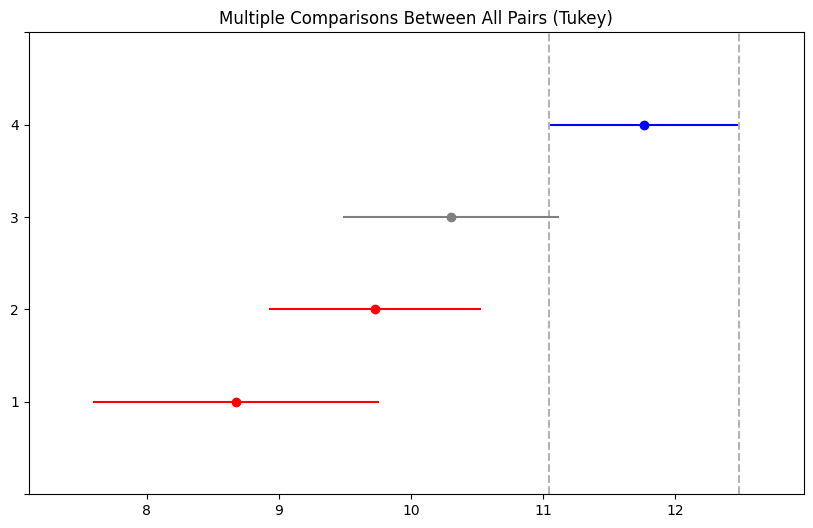

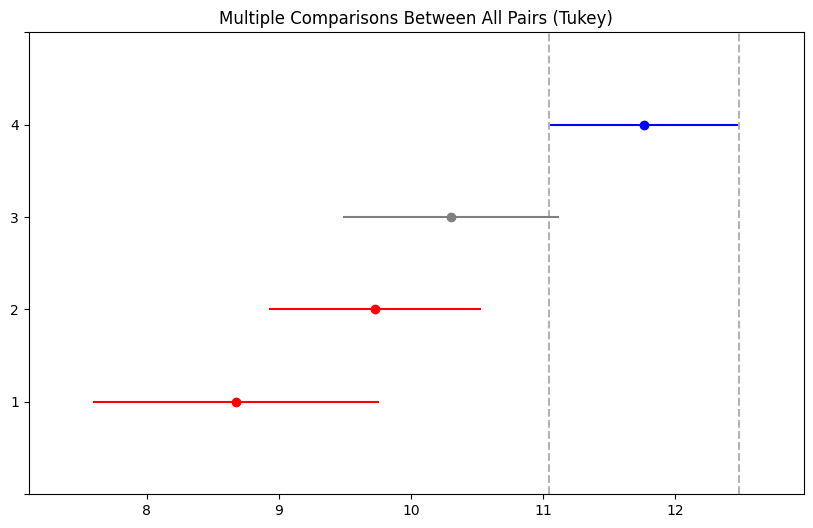

In [11]:
import statsmodels.stats.multicomp as mc

cp = mc.MultiComparison(stud_perf2.G3, stud_perf2.Medu)
tk = cp.tukeyhsd()
print(tk)
tk.plot_simultaneous(comparison_name = 4)